In [1]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

/home/krishna/.local/lib/python3.5/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
W0904 18:40:13.177968 140138209736448 deprecation_wrapper.py:119] From /home/krishna/.local/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:58: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0904 18:40:13.179401 140138209736448 deprecation_wrapper.py:119] From /home/krishna/.local/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:442: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0904 18:40:13.181209 140138209736448 deprecation_wrapper.py:119] From /home/krishna/.local/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:3

In [2]:
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [3]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

W0904 18:40:13.430911 140138209736448 deprecation_wrapper.py:119] From /home/krishna/.local/lib/python3.5/site-packages/keras/optimizers.py:711: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0904 18:40:13.443318 140138209736448 deprecation_wrapper.py:119] From /home/krishna/.local/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:2819: The name tf.log is deprecated. Please use tf.math.log instead.

W0904 18:40:13.452798 140138209736448 deprecation.py:323] From /home/krishna/.local/lib/python3.5/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [4]:
train_dir = '/home/krishna/Coding/cats_and_dogs_small/train'
validation_dir = '/home/krishna/Coding/cats_and_dogs_small/validation' 
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [5]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [6]:

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

W0904 18:40:21.342846 140138209736448 deprecation.py:506] From /home/krishna/.local/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:625: calling Constant.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0904 18:40:21.460727 140138209736448 deprecation_wrapper.py:119] From /home/krishna/.local/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:899: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/30
100/100 [==============================] - 41s - loss: 0.6855 - acc: 0.5475 - val_loss: 0.6628 - val_acc: 0.5860
Epoch 2/30
100/100 [==============================] - 38s - loss: 0.6544 - acc: 0.6120 - val_loss: 0.6442 - val_acc: 0.6160
Epoch 3/30
100/100 [==============================] - 38s - loss: 0.6101 - acc: 0.6660 - val_loss: 0.6590 - val_acc: 0.6060
Epoch 4/30
100/100 [==============================] - 38s - loss: 0.5751 - acc: 0.6880 - val_loss: 0.5976 - val_acc: 0.6630
Epoch 5/30
100/100 [==============================] - 39s - loss: 0.5453 - acc: 0.7285 - val_loss: 0.6032 - val_acc: 0.6650
Epoch 6/30
100/100 [==============================] - 38s - loss: 0.5188 - acc: 0.7405 - val_loss: 0.6646 - val_acc: 0.6420
Epoch 7/30
100/100 [==============================] - 38s - loss: 0.4915 - acc: 0.7675 - val_loss: 0.5720 - val_acc: 0.6830
Epoch 8/30
100/100 [==============================] - 38s - loss: 0.4616 - acc: 0.7810 - val_loss: 0.5433 - val_acc: 0.7240
Epoch 9/

In [7]:
model.save('cats_and_dogs_small_1.h5')


31
range(1, 31)


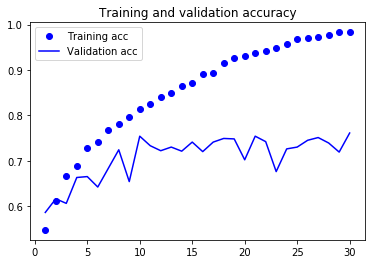

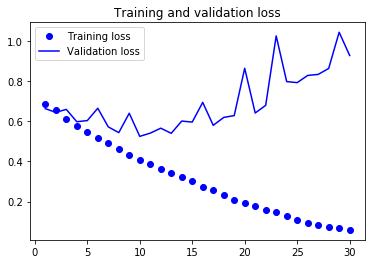

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)
print(len(acc)+1)
print(epochs)
#print(acc)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()